In [1]:
import pandas as pd
import json
from pprint import pprint
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean, stdev
plt.rcParams.update({'font.size': 7})
display(HTML("<style>.container { width:70% !important; }</style>"))

### Azure multi-region ping latency 

In [2]:
results = json.load(open("../data/ping_results.json","r"))

In [3]:
# Clear tipy-vm prefix from VM names:
results = {vm1_name.split("-")[-1]: {vm2_name.split("-")[-1]: metrics for vm2_name, metrics in other_vms.items()} 
           for vm1_name, other_vms in results.items()}

In [4]:
def get_single_metric(data: dict, metric_name="avg"):
    return {vm1_name: {vm2_name: metrics[metric_name] for vm2_name, metrics in other_vms.items()}
            for vm1_name, other_vms in data.items()}

In [5]:
df_avg = pd.DataFrame.from_dict(get_single_metric(results, "avg"))
df_min = pd.DataFrame.from_dict(get_single_metric(results, "min"))
df_max = pd.DataFrame.from_dict(get_single_metric(results, "max"))
df_mdev = pd.DataFrame.from_dict(get_single_metric(results, "mdev"))

In [6]:
df_avg = pd.concat([df_avg.iloc[[-1]], df_avg[:-1]])  # just move eastus location row on top 

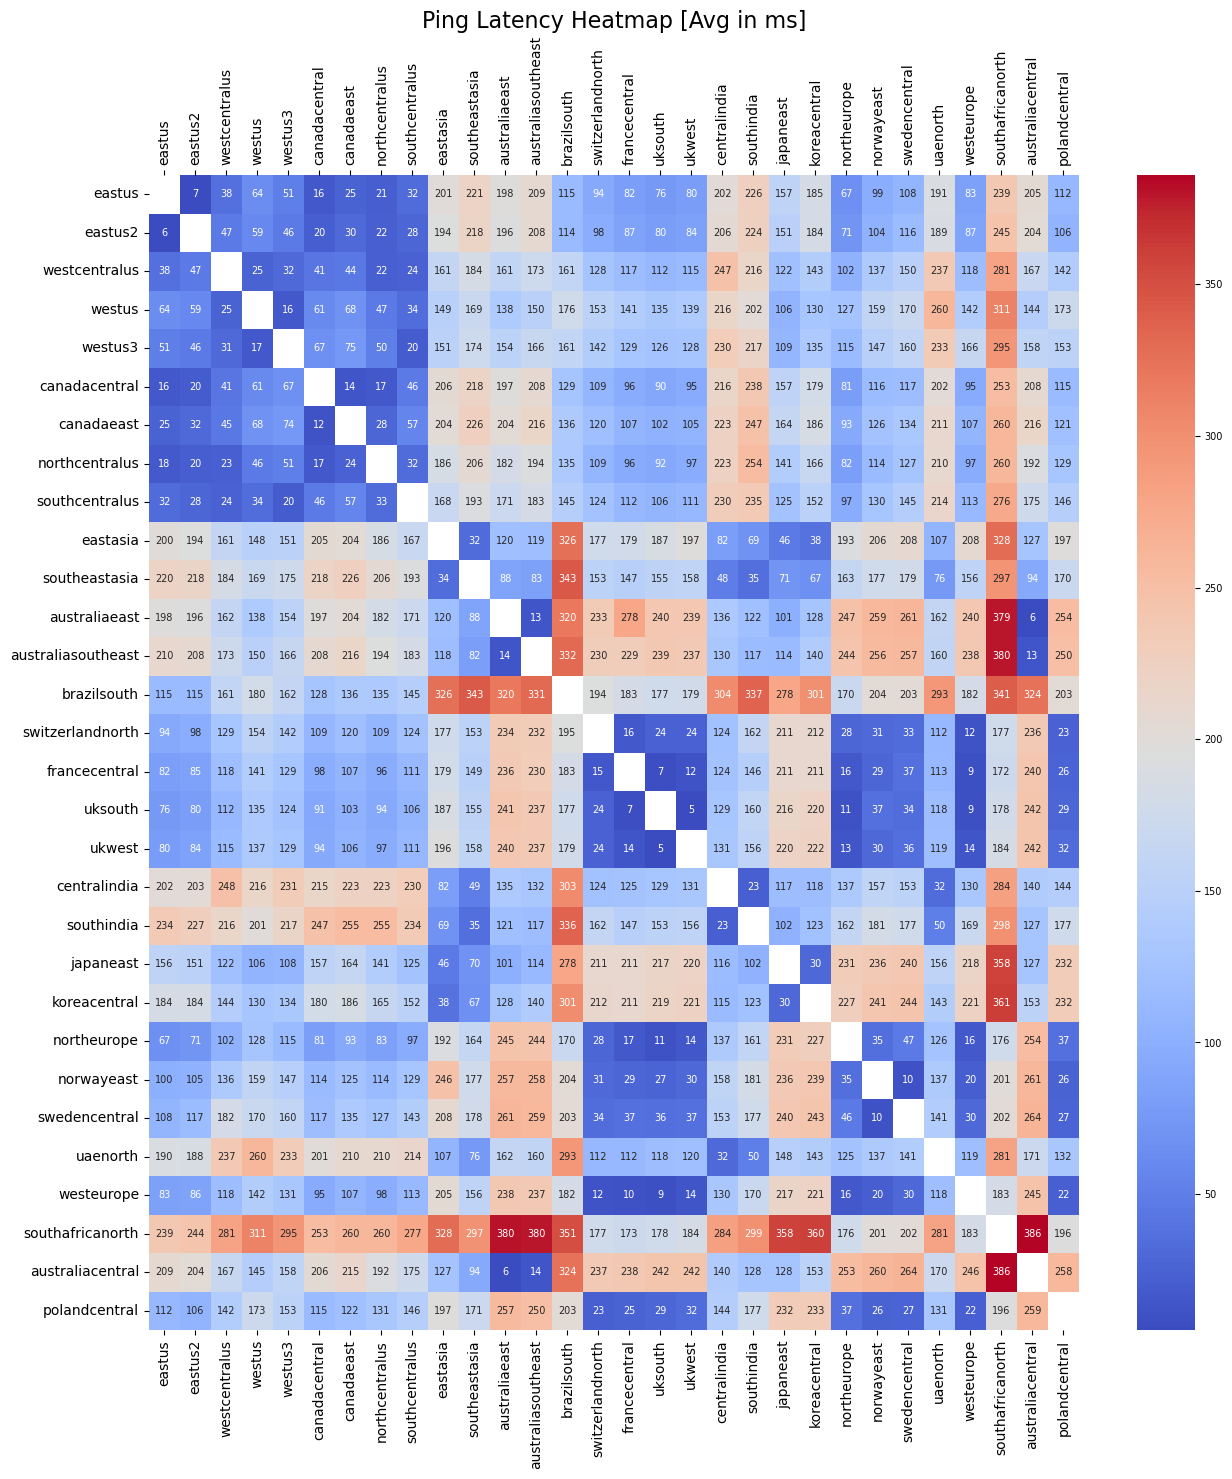

In [7]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_avg, annot=True, cmap='coolwarm', fmt=".0f")
ax.tick_params(top=True, labeltop=True, labelrotation=0)
plt.xticks(rotation='vertical')
plt.title('Ping Latency Heatmap [Avg in ms]', size=16)
plt.tick_params(axis='both', which='both', labelsize=10)
plt.show()

### Azure blob storage download (no CDN)

Config:
- command: `TIMEFORMAT=%R;time wget -q {url} -O /dev/null`
- filesize: `240MB`
- storage region: `UK South`
- N_measurements: `5`
- setup: `single download from each location before measuring`
- instance type: `Standard_B1s`

In [26]:
storage_results = json.load(open("../data/storage_results.json","r"))

In [27]:
# Clear tipy-vm prefix from VM names:
storage_results = {vm_name.split("-")[-1]: measurements for vm_name, measurements in storage_results.items()}

In [28]:
storage_results

{'eastus': [11.644, 11.315, 11.443, 11.406, 11.494],
 'eastus2': [12.02, 12.002, 12.205, 13.447, 12.04],
 'westcentralus': [16.548, 17.105, 17.001, 17.019, 18.04],
 'westus': [20.025, 19.773, 22.101, 20.18, 19.743],
 'westus3': [18.327, 18.484, 18.218, 18.621, 18.142],
 'canadacentral': [14.083, 13.633, 14.106, 13.693, 13.876],
 'canadaeast': [15.397, 15.303, 15.273, 15.676, 15.364],
 'northcentralus': [13.537, 13.55, 14.78, 15.526, 18.437],
 'southcentralus': [16.12, 377.538, 15.684, 31.693, 16.51],
 'eastasia': [27.09, 26.498, 25.966, 33.16, 26.926],
 'southeastasia': [21.978, 23.549, 21.566, 23.514, 23.568],
 'australiaeast': [34.481, 42.993, 34.727, 34.642, 34.002],
 'australiasoutheast': [34.03, 34.525, 34.083, 36.237, 35.057],
 'brazilsouth': [25.747, 25.938, 25.64, 25.927, 25.781],
 'switzerlandnorth': [4.227, 4.002, 4.165, 4.176, 4.245],
 'francecentral': [3.614, 3.808, 3.828, 3.784, 3.851],
 'uksouth': [3.314, 3.339, 3.407, 3.576, 3.935],
 'ukwest': [3.527, 3.926, 3.443, 3.768

In [29]:
storage_results_min = {location: min(measurements) for location, measurements in storage_results.items()}
storage_results_avg = {location: mean(measurements) for location, measurements in storage_results.items()}
storage_results_max = {location: max(measurements) for location, measurements in storage_results.items()}

In [30]:
storage_results_min

{'eastus': 11.315,
 'eastus2': 12.002,
 'westcentralus': 16.548,
 'westus': 19.743,
 'westus3': 18.142,
 'canadacentral': 13.633,
 'canadaeast': 15.273,
 'northcentralus': 13.537,
 'southcentralus': 15.684,
 'eastasia': 25.966,
 'southeastasia': 21.566,
 'australiaeast': 34.002,
 'australiasoutheast': 34.03,
 'brazilsouth': 25.64,
 'switzerlandnorth': 4.002,
 'francecentral': 3.614,
 'uksouth': 3.314,
 'ukwest': 3.413,
 'centralindia': 18.571,
 'southindia': 21.752,
 'japaneast': 30.8,
 'koreacentral': 32.106,
 'northeurope': 3.447,
 'norwayeast': 5.555,
 'swedencentral': 5.894,
 'uaenorth': 16.689,
 'westeurope': 3.75,
 'southafricanorth': 24.094,
 'australiacentral': 35.092,
 'polandcentral': 4.992}

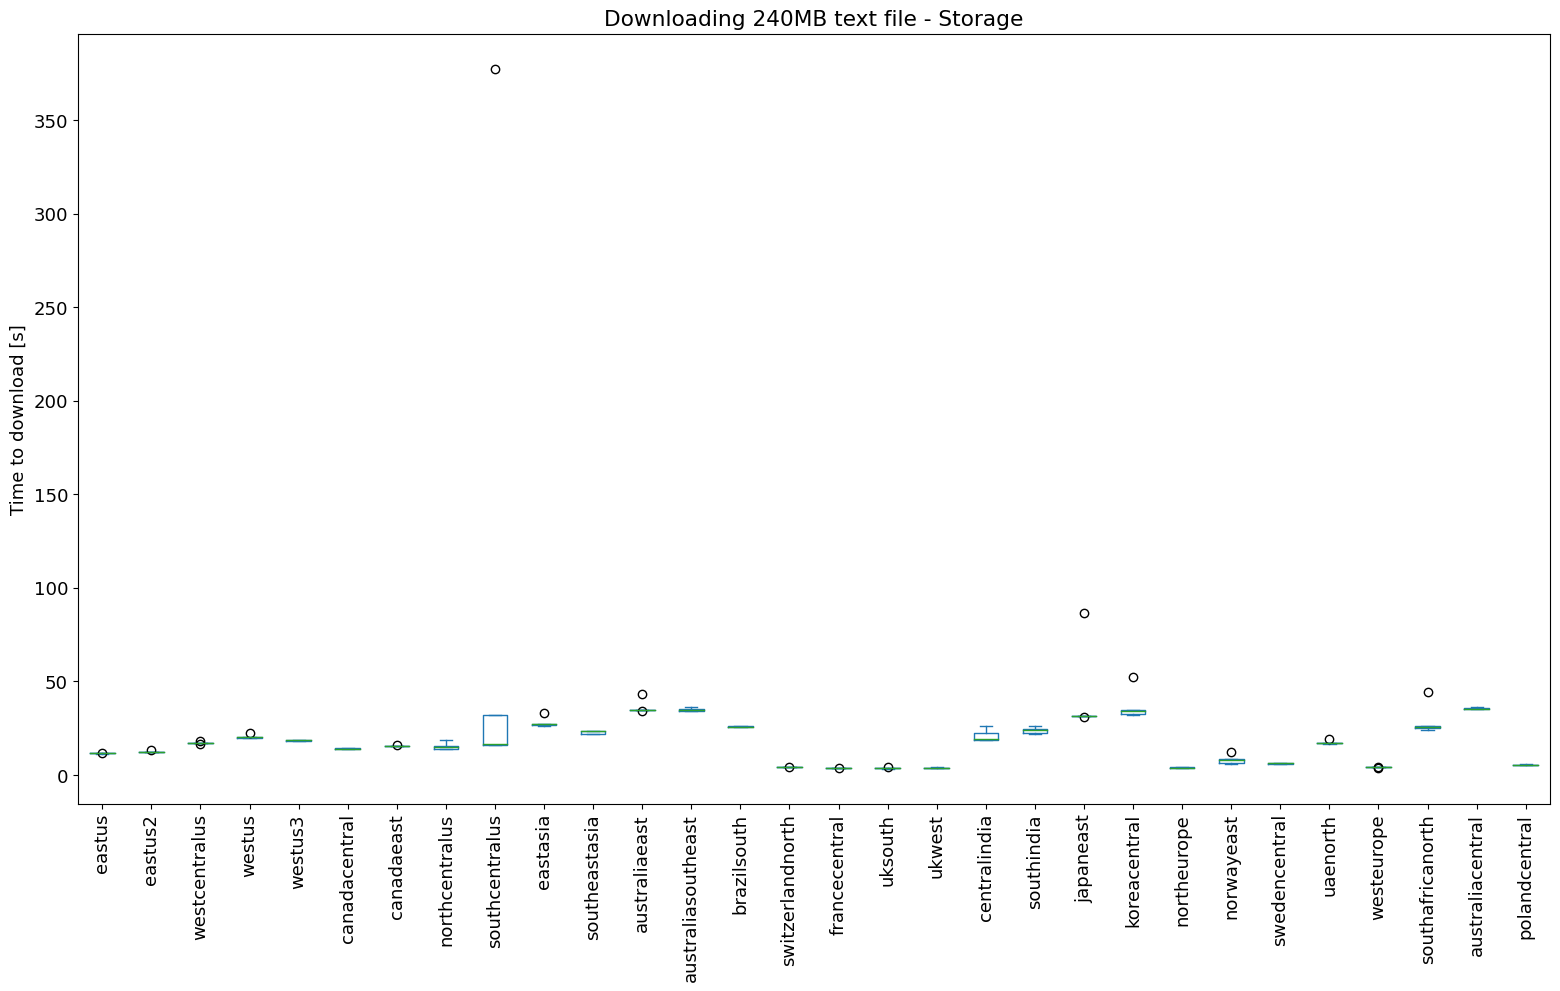

In [50]:
ax = pd.DataFrame(storage_results).plot.box(figsize=(19,10), title="Downloading 240MB text file - Storage", xlabel="Location", ylabel="Time to download [s]");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Azure blob storage download (with CDN)

In [12]:
cdn_results = json.load(open("../data/cdn_results.json","r"))

In [13]:
# Clear tipy-vm prefix from VM names:
cdn_results = {vm_name.split("-")[-1]: measurements for vm_name, measurements in cdn_results.items()}

In [18]:
cdn_results

{'eastus': [7.953, 7.901, 7.756, 7.735, 8.115],
 'eastus2': [8.289, 8.313, 8.102, 8.036, 7.858],
 'westcentralus': [68.612, 34.217, 17.222, 11.875, 57.679],
 'westus': [12.65, 12.624, 13.542, 16.099, 12.832],
 'westus3': [13.051, 13.106, 12.971, 12.955, 13.615],
 'canadacentral': [8.86, 8.991, 9.175, 9.287, 6.733],
 'canadaeast': [12.489, 9.424, 9.53, 9.373, 6.685],
 'northcentralus': [49.001, 44.661, 50.668, 46.55, 9.334],
 'southcentralus': [15.589, 11.819, 10.29, 11.41, 10.82],
 'eastasia': [78.185, 18.232, 17.693, 19.75, 17.814],
 'southeastasia': [15.264, 15.102, 16.619, 14.932, 67.689],
 'australiaeast': [22.928, 22.82, 22.041, 22.16, 39.638],
 'australiasoutheast': [20.935, 20.492, 21.561, 22.15, 21.96],
 'brazilsouth': [17.076, 17.47, 17.276, 17.278, 11.768],
 'switzerlandnorth': [3.759, 3.822, 3.734, 4.628, 5.26],
 'francecentral': [5.119, 4.368, 4.138, 7.793, 5.694],
 'uksouth': [2.291, 2.425, 2.417, 2.226, 2.311],
 'ukwest': [3.017, 2.706, 2.623, 2.941, 3.173],
 'centralindi

In [24]:
cdn_results_min = {location: min(measurements) for location, measurements in cdn_results.items()}
cdn_results_avg = {location: mean(measurements) for location, measurements in cdn_results.items()}
cdn_results_max = {location: max(measurements) for location, measurements in cdn_results.items()}

In [25]:
cdn_results_min

{'eastus': 7.735,
 'eastus2': 7.858,
 'westcentralus': 11.875,
 'westus': 12.624,
 'westus3': 12.955,
 'canadacentral': 6.733,
 'canadaeast': 6.685,
 'northcentralus': 9.334,
 'southcentralus': 10.29,
 'eastasia': 17.693,
 'southeastasia': 14.932,
 'australiaeast': 22.041,
 'australiasoutheast': 20.492,
 'brazilsouth': 11.768,
 'switzerlandnorth': 3.734,
 'francecentral': 4.138,
 'uksouth': 2.226,
 'ukwest': 2.623,
 'centralindia': 12.85,
 'southindia': 11.49,
 'japaneast': 22.123,
 'koreacentral': 21.168,
 'northeurope': 3.015,
 'norwayeast': 4.182,
 'swedencentral': 3.939,
 'uaenorth': 13.252,
 'westeurope': 3.291,
 'southafricanorth': 16.667,
 'australiacentral': 20.951,
 'polandcentral': 4.651}

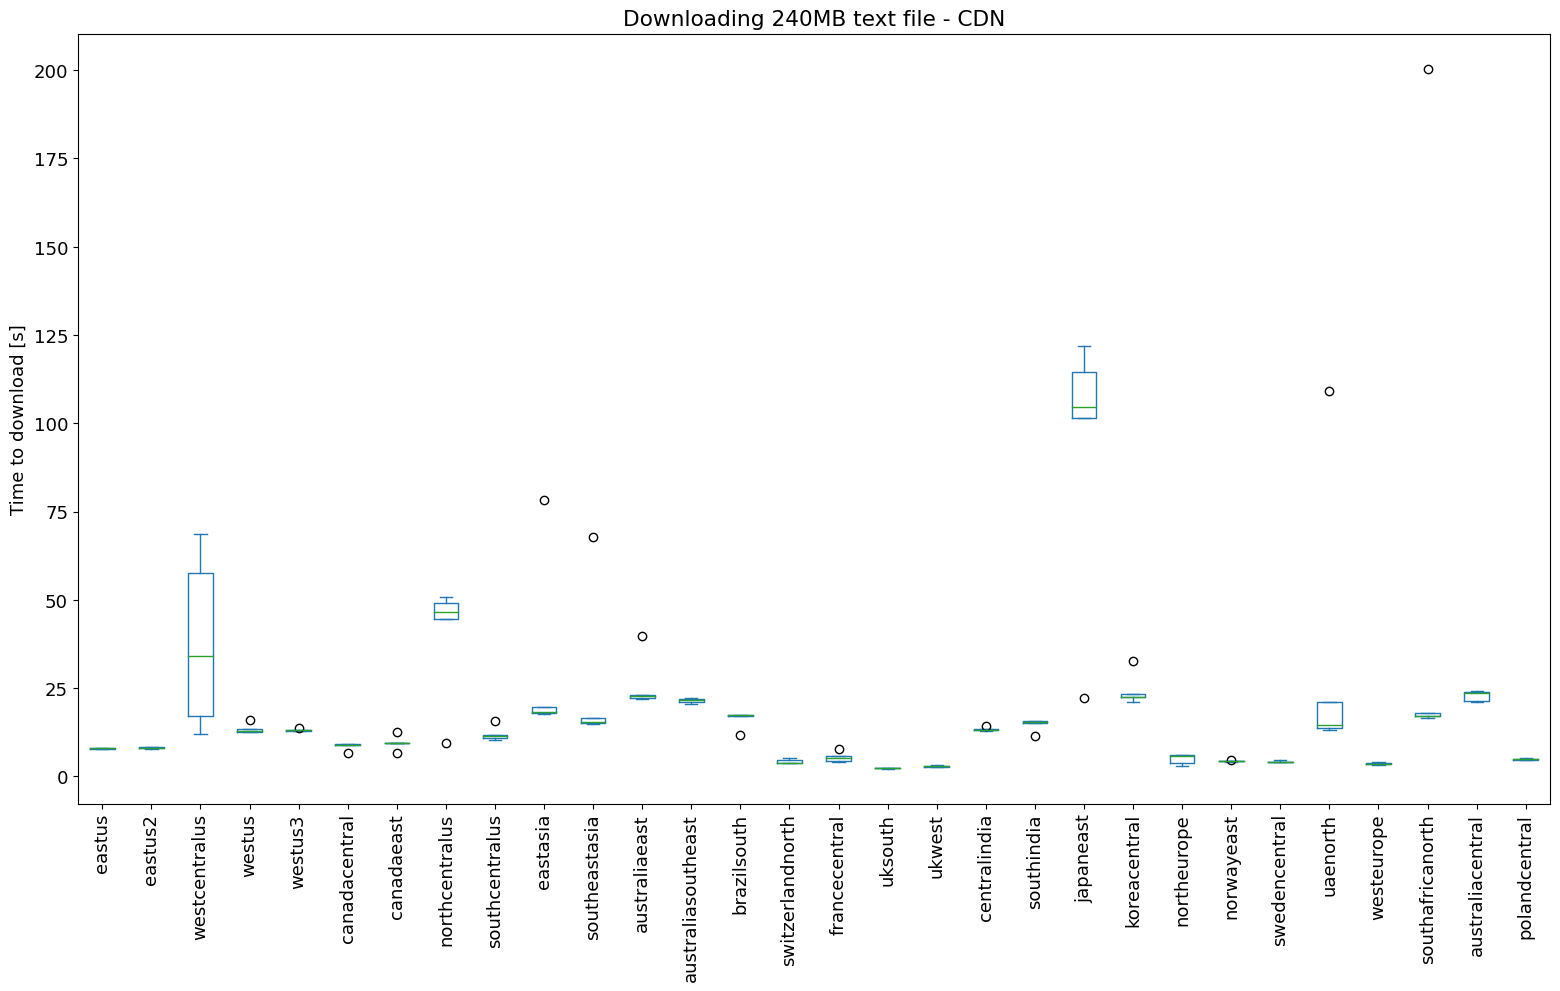

In [52]:
ax = pd.DataFrame(cdn_results).plot.box(figsize=(19,10), title="Downloading 240MB text file - CDN", xlabel="Location", ylabel="Time to download [s]");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### CDN impact on latency

In [23]:
plt.rcParams.update({'font.size': 13})

In [34]:
storage_cdn_df_min = pd.DataFrame([storage_results_min, cdn_results_min], index=["Without CDN [Min]", 'With CDN [Min]']).T
storage_cdn_df_avg = pd.DataFrame([storage_results_avg, cdn_results_avg], index=["Without CDN [Avg]", 'With CDN [Avg]']).T
storage_cdn_df_max = pd.DataFrame([storage_results_max, cdn_results_max], index=["Without CDN [Max]", 'With CDN [Max]']).T

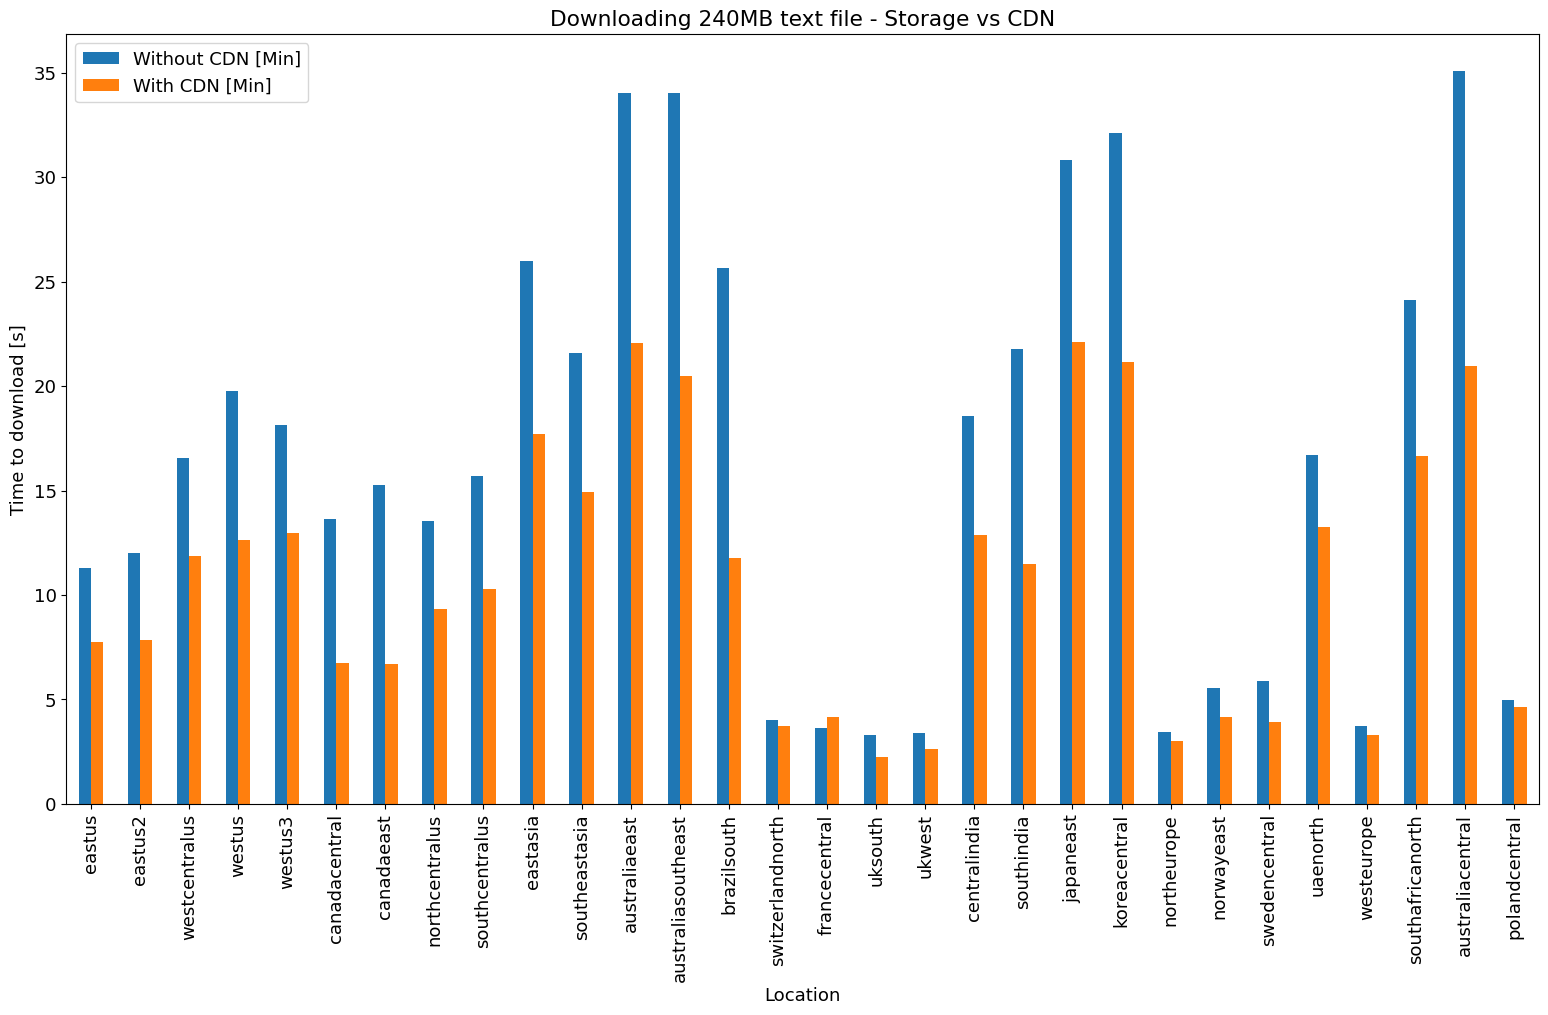

In [35]:
storage_cdn_df_min.plot.bar(figsize=(19,10), title="Downloading 240MB text file - Storage vs CDN", xlabel="Location", ylabel="Time to download [s]").legend(loc='upper left');

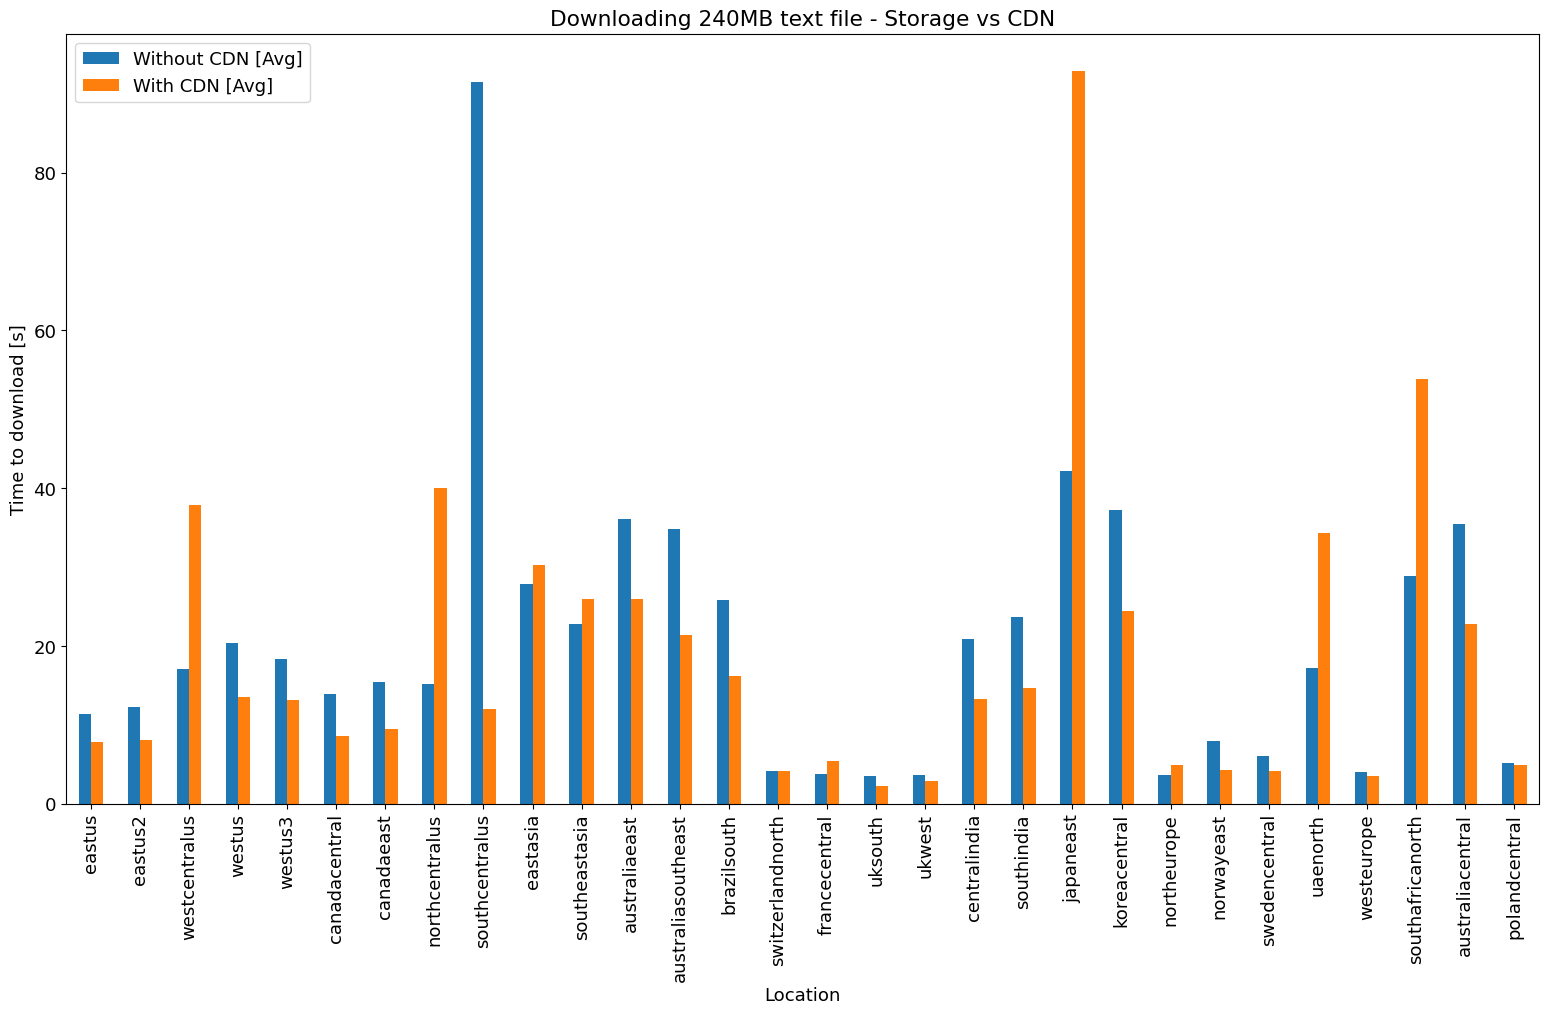

In [36]:
storage_cdn_df_avg.plot.bar(figsize=(19,10), title="Downloading 240MB text file - Storage vs CDN", xlabel="Location", ylabel="Time to download [s]").legend(loc='upper left');

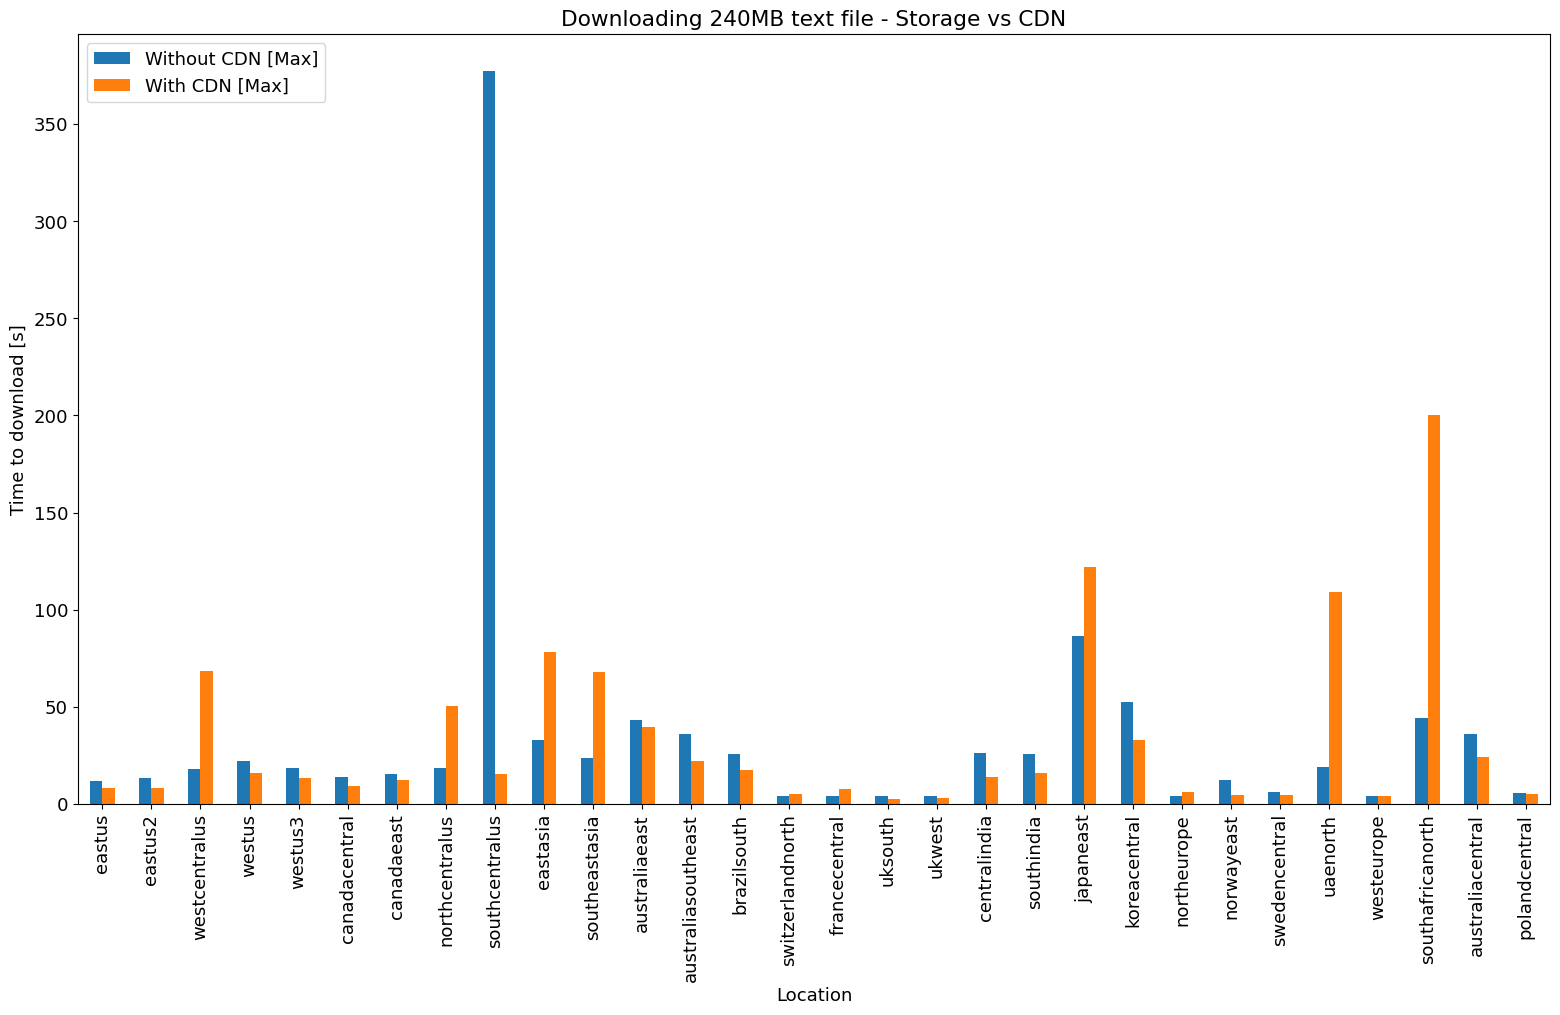

In [34]:
storage_cdn_df_max.plot.bar(figsize=(19,10), title="Downloading 240MB text file - Storage vs CDN", xlabel="Location", ylabel="Time to download [s]").legend(loc='upper left');